<a href="https://colab.research.google.com/github/jessamcs/Week7_Classification/blob/main/LogisticRandom_forestKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor #forRandomForest 


In [2]:
df = pd.read_csv('/content/Wine_cultivars (1).csv')
df.head()




,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1) Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. 

In [3]:
X = df.drop(columns=['Class label'])
y = df['Class label']

In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)

In [6]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
0.9777777777777777


In [7]:
# Using L1

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 

In [8]:
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

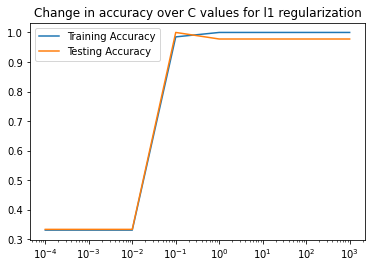

In [9]:
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [10]:
# create a list of c values and empty lists for scores
#L2 tuning
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

In [11]:
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

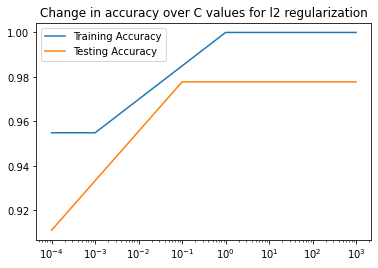

In [12]:
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

2) After doing that, try using KNN and Random Forest models. 

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

scaler = StandardScaler() 

KNClassifier = KNeighborsClassifier(n_neighbors=5)
KNClassifier_pipe = make_pipeline(scaler, KNClassifier)
KNClassifier_pipe.fit(X_train, y_train)
KNpredictions = KNClassifier.predict(X_test)
score = KNClassifier.score(X_test, y_test)
print(score)

0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [14]:
# Accuracy of using KNClassifier
cm = confusion_matrix(y_test.values, KNpredictions)
cm.ravel()
accuracy = accuracy_score(y_test, KNpredictions)
print('Accuracy: ',  accuracy)

Accuracy:  0.3333333333333333


In [16]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9903771180030257
0.9134962686567164


In [17]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9903771180030257
0.9134962686567164


3) Address these questions in a text cell at the end of your code:
Which model performed the best? 
L1 & L2 HYPERPARAMETERS

Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?
L1 & L2 SHOWS GOOD PERFORMANCE WITH MINIMAL ACCURACY VARIANCE BETWEEN TRAIN AND TEST SET. KNN SHOWS LOW ACCURACY OF 33%. RANDOM FOREST PERFORMS 99% FOR TRAIN SET AND 91% FOR TEST SET.

